Task 0

/home/grayzaghnal/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


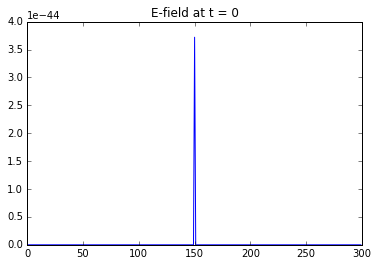

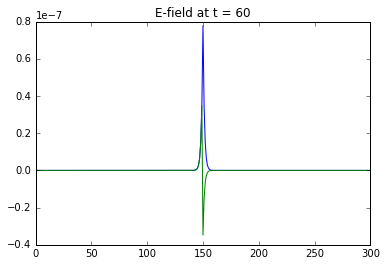

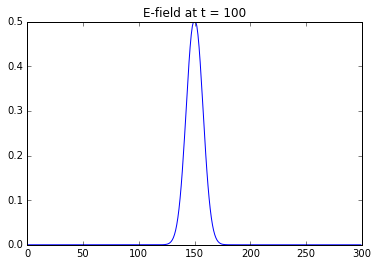

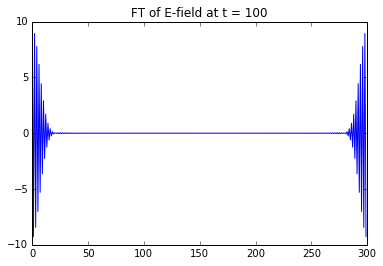

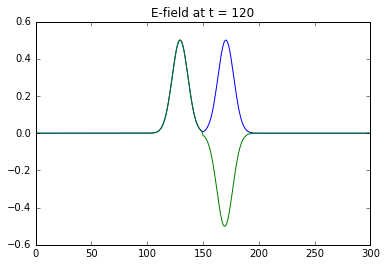

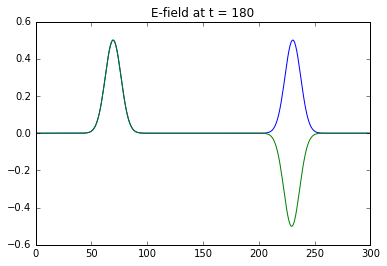

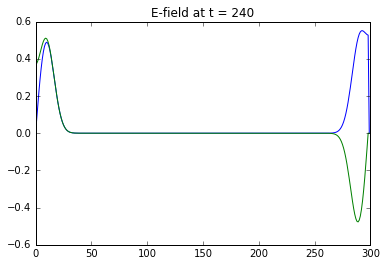

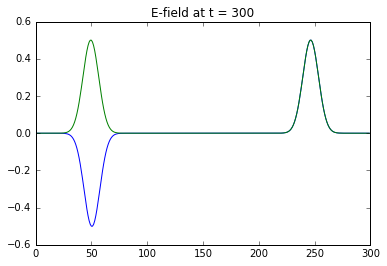

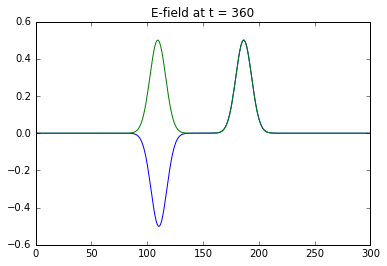

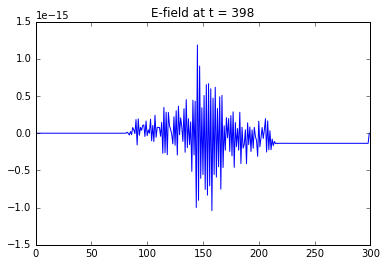

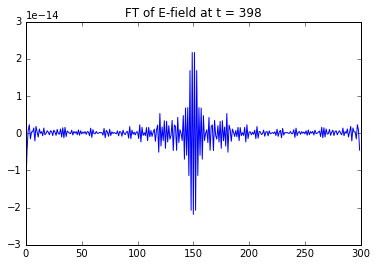

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation

import numpy as np
import math as m

nx = 300
srcori = int(nx/2) #source is at center
srcwid = 10 #source width
srcdel = 100 #source delay
nt = nx+srcdel

imp0 = 337.0 #impedance

ez = np.zeros(nx)
hy = np.zeros(nx)

#eplot = open('eplot', 'w')
#hplot = open('hplot', 'w')

fignum = 0

for dt in range(0,nt):
    for j in range(0,nx-2):
        hy[j] = hy[j] + (ez[j+1]-ez[j])/imp0
        
    for j in range(1,nx-1):
        ez[j] = ez[j] + (hy[j]-hy[j-1])*imp0
    #ez[srcori] += m.exp(-(dt-srcdel)*(dt-srcdel)/srcwid)
    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))

    
    plt.hold(True)
    if (dt == srcdel):
        fignum+=1
        plt.figure(fignum)
        plt.title("E-field at t = "+ str(dt))
        plt.plot(ez)
        
        fignum+=1
        plt.figure(fignum)
        plt.title("FT of E-field at t = "+ str(dt))
        plt.plot(np.fft.fft(ez))
    
    if (dt % 60 == 0 or dt == nt-2):
        fignum += 1
        plt.figure(fignum)
        plt.title("E-field at t = "+ str(dt))        
        plt.plot(ez)
        
        if (dt != nt-2):
            plt.plot(hy*imp0)
        elif (dt == nt-2):
            fignum+=1
            plt.figure(fignum)
            plt.title("FT of E-field at t = "+ str(dt))
            plt.plot(np.fft.fft(ez))
            